In [9]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

%matplotlib inline
import cv2

## 라벨적용

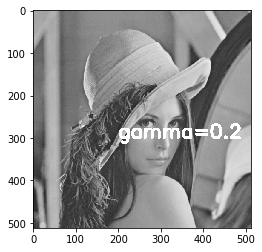

In [2]:
img = cv2.imread('./data/lena.png', cv2.IMREAD_GRAYSCALE)
#print(img.shape) #(512, 512)
col = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)#그레이 - > 칼라로 표시
#print(col.shape) #(512, 512, 3)

cv2.putText(col, 'gamma=0.2', (200,300),# 이미지, 표시할 내용, 출력할 위치
           cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255) , 5) # 글자 색 , 글자 크기, 글자 굵기

plt.imshow(col)

## 라벨적용2

In [3]:
#감마lut
def gamma_lut(gamma):
    invGamma = 1.0/gamma
    return np.array([(x / 255.0)**invGamma*255
                     for x in range(256) ]).astype('uint8')

In [4]:
img = cv2.imread('./data/original_dog.jpg', cv2.COLOR_BGR2RGB)
gamma_num = [0.5,1.2,2.5,3.0]
for i in range(len(gamma_num)):
    col = cv2.LUT(img, gamma_lut(gamma_num[i]))
    cv2.putText(col, 'gamma='+str(gamma_num[i]), (200,300),
                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255) , 5) 
    cv2.imwrite('./data/dog'+str(i+1)+'.jpg',np.hstack([img,col]))
    
    

In [5]:
from PIL import Image
im1 = Image.open('./data/dog1.jpg')
im2 = Image.open('./data/dog2.jpg')
im3 = Image.open('./data/dog3.jpg')
im4 = Image.open('./data/dog4.jpg')

im1.save("./data/dogdog.gif", save_all=True, append_images=[im2, im3, im4],
        duration=200, loop=0)

In [6]:
print(type(im1))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


## 확장자뒤 '?숫자' 넣고 하면 refresh 
<img src=data/dogdog.gif?11 width=300>

## Opencv + 한글 라벨

In [23]:


img = cv2.imread('./data/original_dog.jpg')
#imgPIL = Image.fromarray(img) # BGR 로 변환된다... RGB로 변경해주어야 한다.
imgPIL = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

font = ImageFont.truetype('C:/Windows/Fonts/gulim.ttc', 200)

draw = ImageDraw.Draw(imgPIL)
draw.text((200,300), "안녕", font=font , fill=(255,255,0)  )
imgPIL.save('./data/doghan.jpg')